<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Рамиль! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='purple'><b>Комментарий студента:</b></font>
Павел привет, уже второй проект к ряду))

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<h1>Прогнозирование заказов такси<span class="tocSkip"></span></h1>

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import catboost
import lightgbm
import sklearn
import warnings

from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
print('LGBM vers.:', lightgbm.__version__)
print('sklearn vers.:', sklearn.__version__)

RANDOM_STATE = 12345

warnings.filterwarnings('ignore')

LGBM vers.: 3.3.1
sklearn vers.: 0.24.1


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [2]:
pth1 = '/Users/ramilvaleev/Desktop/Yandex Projects/Проекты в работе/Такси/taxi.csv'
pth2 = '/datasets/taxi.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, parse_dates=[0], index_col=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, parse_dates=[0], index_col=[0])
else:
    print('Something is wrong')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

In [3]:
def check_df(df):
    rows_count, columns_count = df.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(df.head(10))
    display(df.describe())
    df.info()
    print('\nКоличество пропусков:')
    print(df.isna().sum())
    print('\nДаты упорядочены в хронологическом порядке:')
    print(data.index.is_monotonic_increasing)

In [4]:
check_df(data)

Количество стобцов: 1
Количество строк: 26496


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

Количество пропусков:
num_orders    0
dtype: int64

Даты упорядочены в хронологическом порядке:
True


In [5]:
data = data.resample('1H').sum()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

**Вывод:**

У нас есть данные заказов такси с марта по август 2018 года. Мы изменили тип данных `Datetime` с object на datetime64 и установили индекс таблицы равным столбцу `Datetime`. Проверили на наличие пропусков, на монотонность и ресемплировали данные по часу (изначально данные за каждые 10 минут).

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Анализ

In [6]:
# сохраним оригинальный датасет на всякий случай
data_original = data.copy()

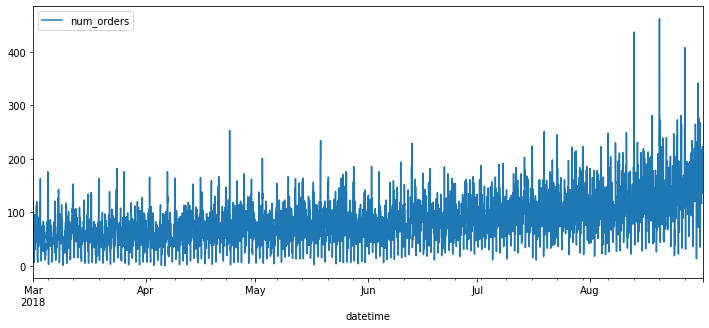

In [7]:
data.plot(figsize=(12, 5));

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Есть график временного ряда! </font>

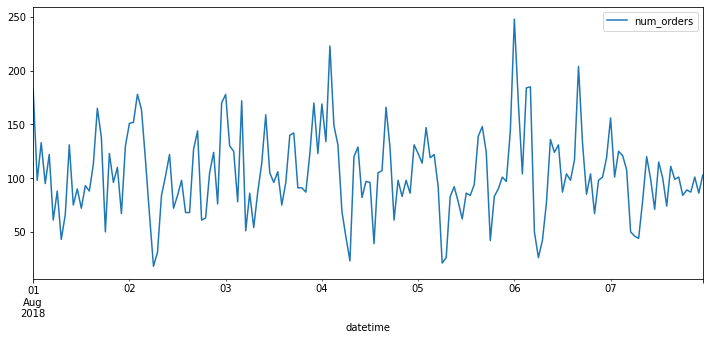

In [8]:
data['2018-08-01':'2018-08-07'].plot(figsize=(12, 5));

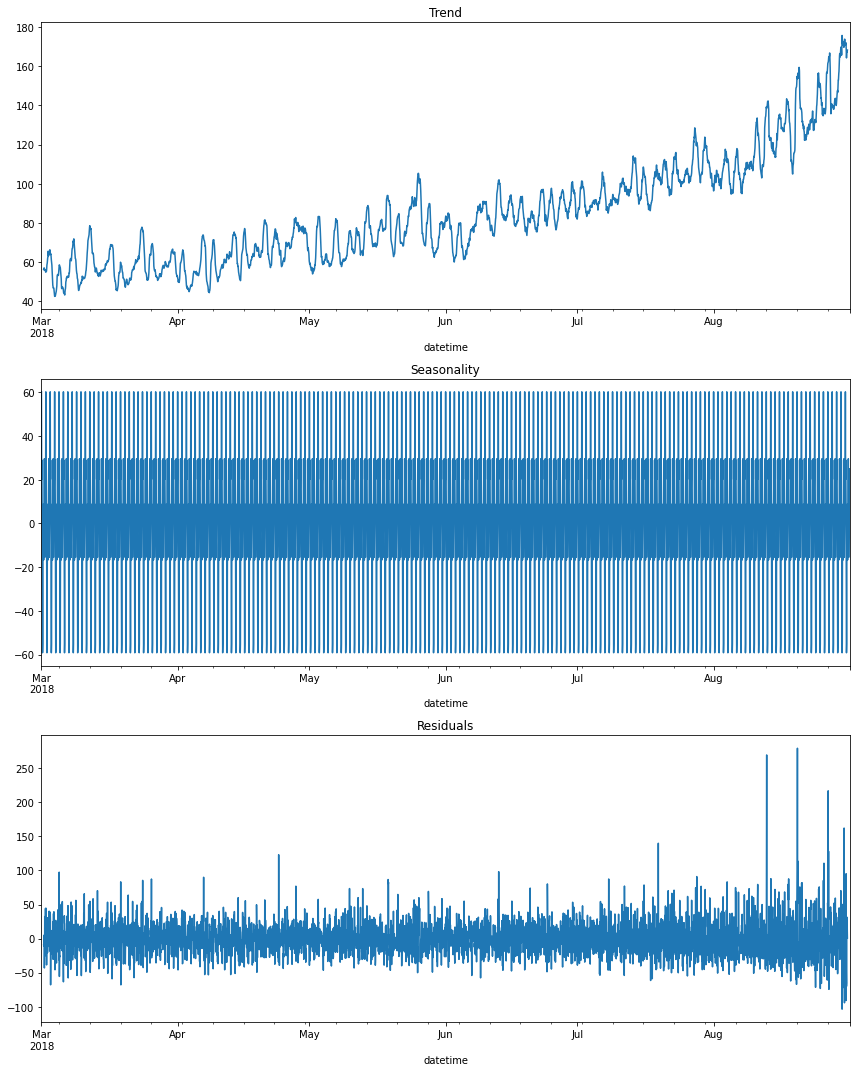

In [9]:
decomposed = seasonal_decompose(data) 

plt.figure(figsize=(12, 15))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

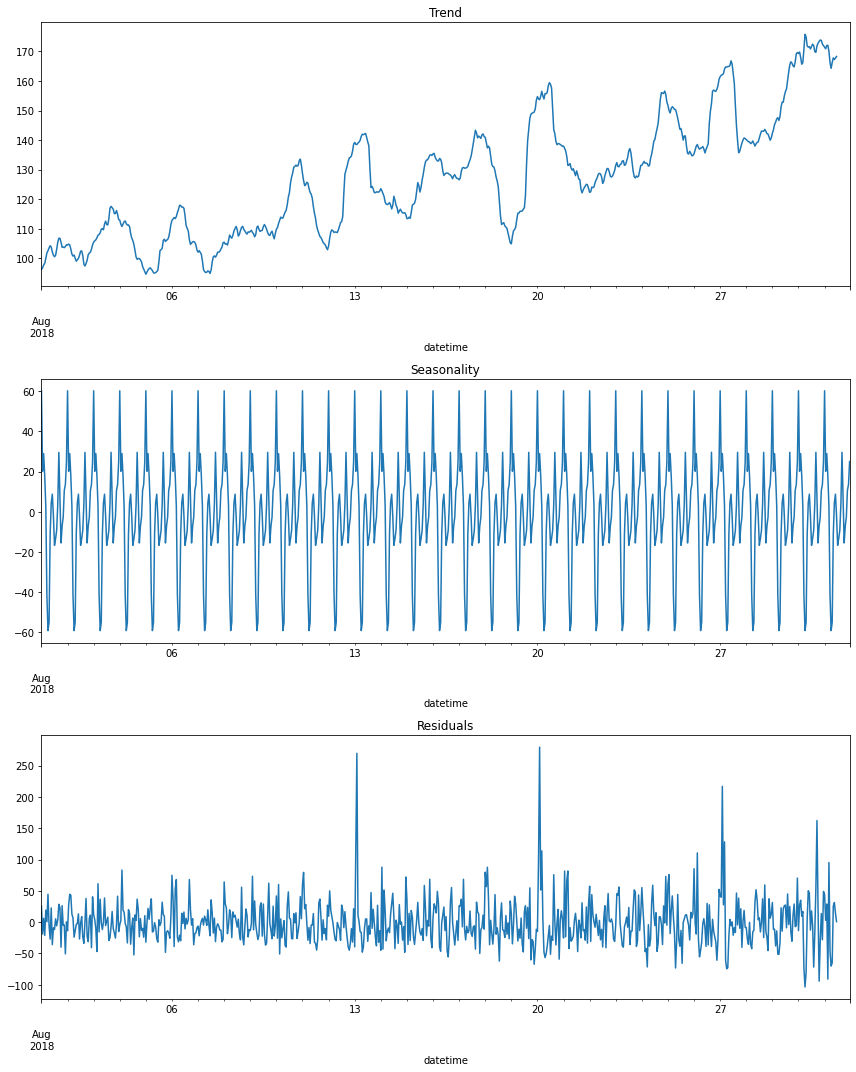

In [10]:
plt.figure(figsize=(12, 15))
plt.subplot(311)
decomposed.trend['2018-08-01':].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-08-01':].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid['2018-08-01':].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

In [11]:
data_daily = data.resample('1D').sum()
decomposed_daily = seasonal_decompose(data_daily) 

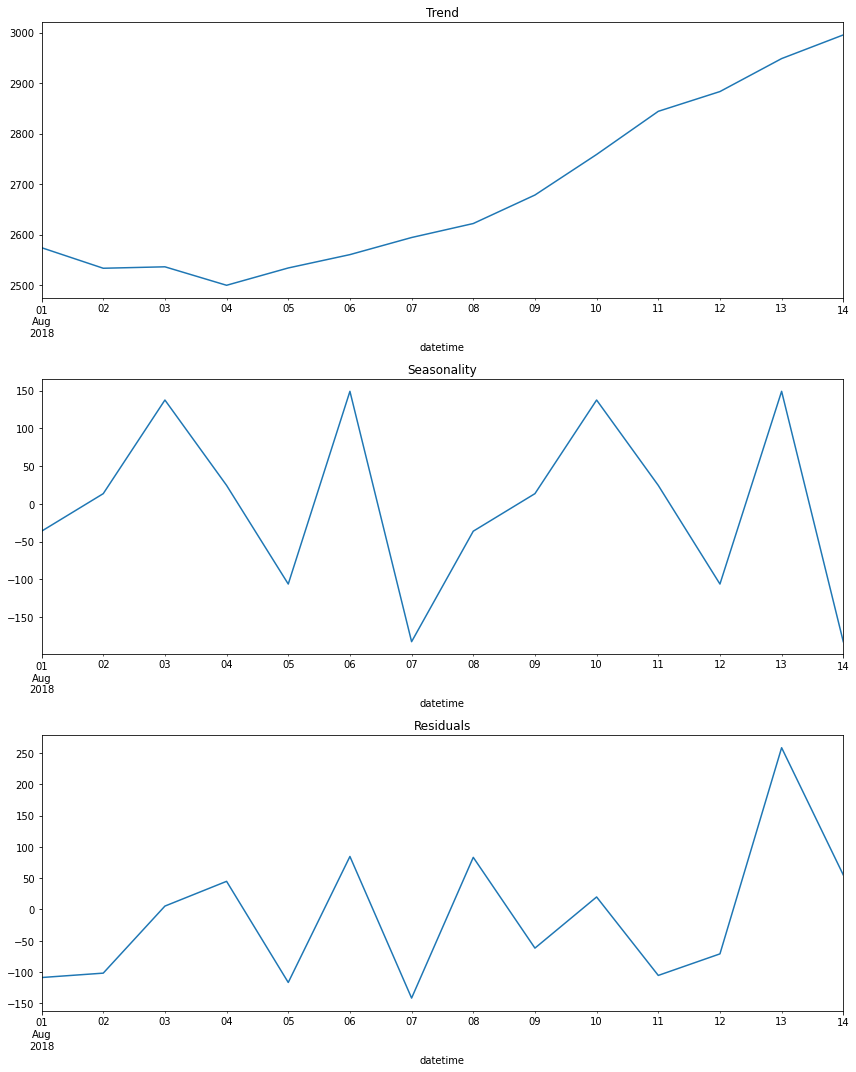

In [12]:
plt.figure(figsize=(12, 15))
plt.subplot(311)
decomposed_daily.trend['2018-08-01':'2018-08-14'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_daily.seasonal['2018-08-01':'2018-08-14'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_daily.resid['2018-08-01':'2018-08-14'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

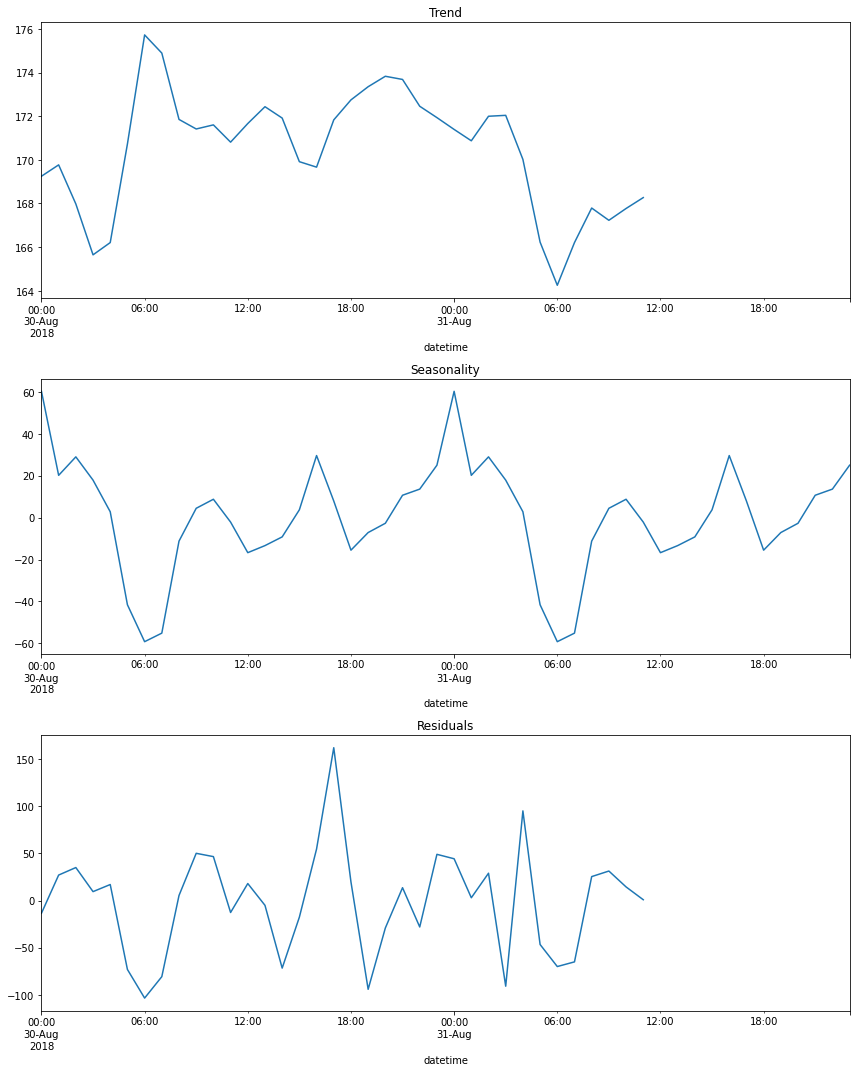

In [13]:
plt.figure(figsize=(12, 15))
plt.subplot(311)
decomposed.trend['2018-08-30':].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-08-30':].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid['2018-08-30':].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

По графикам тренда можно заметить, что количество заказов такси с марта по август выросло почти в 3 раза. По графикам сезонности видно что пик заказов приходится на полночь, а наименьшее количество заказов приходит в 6 утра. Так же существует сезонность внутри недели, пики заказов в понедельник и пятницу, просадки есть в воскресенье и вторник. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что компоненты рассмотренны на различных временных интервалах.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал около месяца, то можно увидеть сезонность внутри недели.</font>

<font color='purple'><b>Комментарий студента:</b></font>
Сделал, и правда есть сезонность, спасибо))

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

Проверим стационарность временного ряда.

Для этого найдем разности временного ряда (англ. time series difference) — это набор разностей между соседними элементами временного ряда, т. е. из каждого значения вычитается предыдущее. Для поиска разностей временного ряда применяется метод shift() (англ. «сдвиг»). Все значения он сдвигает вдоль временной оси на один шаг вперёд.

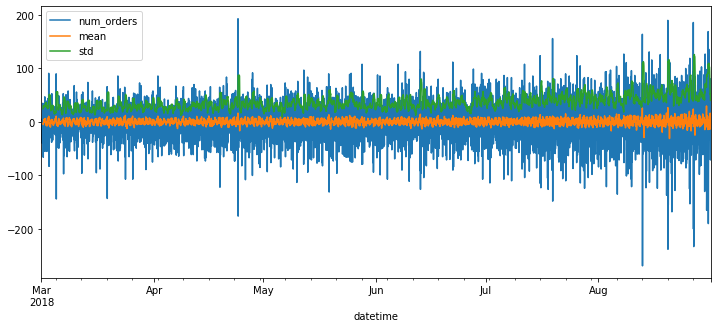

In [14]:
data1 = data - data.shift()
data1['mean'] = data1['num_orders'].rolling(11).mean()
data1['std'] = data1['num_orders'].rolling(11).std()
data1.plot(figsize=(12,5));

По графику видно, что ряд достаточно стационарен, поскольку его среднее значение и стандартное отклонение не сильно меняются.

Проведем тест Дики-Фуллера

In [15]:
adf = adfuller(data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical values:')
for key, value in adf[4].items():
  print('\t {}: {}'.format(key, value))
if adf[1] < 0.05:
    print(f'{adf[1].round(4)} < 0.05.\
    Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера'
         )
else:
    print(f'{adf[1].round(4)} > 0.05.\
    Нулевая гипотеза не отвергается. Ряд нестационарен по критерию Дики-Фуллера'
         )

ADF Statistic: -3.0689242890279558
p-value: 0.028940051402612906
Critical values:
	 1%: -3.431842162413052
	 5%: -2.8621993540813637
	 10%: -2.567120978470452
0.0289 < 0.05.    Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера


![ADF](https://qph.cf2.quoracdn.net/main-qimg-b611e92757ccef6367b591efa5bb884f)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично! </font>

In [16]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_mean_size).mean()
    
    data.dropna(inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>На мой взгляд: не все признаки подходят, чисто логически. Выскажу свою позицию:<br>

<font color='red'>1) Признак год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Признак месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизонт прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.</font><br>
<font color='darkorange'>3) Признак день: НЕТ, также не подходит, у нас нет сезонности внутри месяца, будет просто последовательность чисел.</s><br></font>
<font color='green'>4) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
5) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.</font> <br>

<font color='red'>Как ты думаешь?</font>

<font color='purple'><b>Комментарий студента:</b></font>
В целом логично, как то я 2+2 не сложил когда это делал) про день чуть чуть не понятно только, если я правильно понял, он не нужен, потому что модель будет сравнивать одинаковый номер дня по месяцам, а у нас там нет изменений? Если так то понял, что к чему)))

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>8 мая никак не похоже на 8 июня или июля, а в признаке День будет именно номер дня в месяце. Плюс в нём будет необосновнное ранжирование от 1 до 30(31), что может приводить к выводам что 1 число, чемто хуже (или лучше) 31го.\
Всё это лишний шум в данных.</font>

In [17]:
make_features(data, 24, 11)
data.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,4,0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,59.000000
2018-03-02 01:00:00,120,4,1,90.0,58.0,113.0,66.0,61.0,45.0,73.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,64.272727
2018-03-02 02:00:00,75,4,2,120.0,90.0,58.0,113.0,66.0,61.0,45.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,70.818182
2018-03-02 03:00:00,64,4,3,75.0,120.0,90.0,58.0,113.0,66.0,61.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.636364
2018-03-02 04:00:00,20,4,4,64.0,75.0,120.0,90.0,58.0,113.0,66.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,73.545455


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Классно, что сдвиг выбран с учётом сезонности в сутках, кратным 24 👍</font>

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-02 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4392 non-null   int64  
 1   dayofweek     4392 non-null   int64  
 2   hour          4392 non-null   int64  
 3   lag_1         4392 non-null   float64
 4   lag_2         4392 non-null   float64
 5   lag_3         4392 non-null   float64
 6   lag_4         4392 non-null   float64
 7   lag_5         4392 non-null   float64
 8   lag_6         4392 non-null   float64
 9   lag_7         4392 non-null   float64
 10  lag_8         4392 non-null   float64
 11  lag_9         4392 non-null   float64
 12  lag_10        4392 non-null   float64
 13  lag_11        4392 non-null   float64
 14  lag_12        4392 non-null   float64
 15  lag_13        4392 non-null   float64
 16  lag_14        4392 non-null   float64
 17  lag_15        4392 non-null

**Вывод:**

В этом разделе мы проанализировали графики временного ряда за все время, меясяц и 2 дня, выявили тренд на увеличение количества заказов с течением времени, а также то, что пик заказов приходится на 12 ночи, а минимум на 6 утра. Так же существует сезонность внутри недели, пики заказов в понедельник и пятницу, просадки есть в воскресенье и вторник. Проверили на стационарность временного ряда. Затем мы создали календарные признаки для месяца, дня, дня недели и часа и отстающие признаки, а также скользящее среднее. Удалили пропуски и получили таблицу с 29 признаками, готовую для построения моделей.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

## Обучение

Выберем следующие регрессоры для обучения модели:

1. LinearRegression
2. DecisionTreeRegressor
3. RandomForest
4. LGBMRegressor
5. CatBoostRegressor

Разделим данные на обучающую и тестовую выборки и построим разные модели, найдя для них наилучшие гиперпараметры.

In [19]:
train, test = train_test_split(data, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)
train = train.dropna()

X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

print('Обучающая выборка: размер - ', X_train.shape, '\nПродолжительность: с', train.index.min(), 'по', train.index.max())
print('\nТестовая выборка: размер - ', X_test.shape, '\nПродолжительность: с', test.index.min(), 'по', test.index.max())

Обучающая выборка: размер -  (3952, 27) 
Продолжительность: с 2018-03-02 00:00:00 по 2018-08-13 15:00:00

Тестовая выборка: размер -  (440, 27) 
Продолжительность: с 2018-08-13 16:00:00 по 2018-08-31 23:00:00


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

Для наглядности визуализируем разделение датасета на обучающую и тестовую выборки.

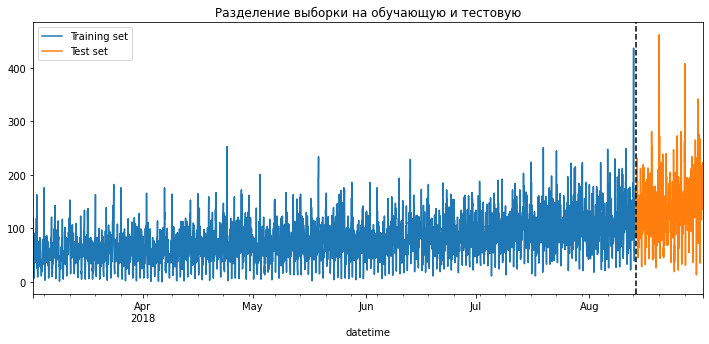

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
y_train.plot(ax=ax, label = 'Train set')
y_test.plot(ax=ax, label = 'Test set')
ax.axvline('2018-08-13 16:00:00', color = 'black', ls = '--')
ax.legend(['Training set', 'Test set'])
plt.title('Разделение выборки на обучающую и тестовую')
plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Для кроссвалидации в GridSearchCV будем использовать TimeSeriesSplit, так как стандартный метод кроссвалидации перемешивает данные, в нашем случае это недопустимо, так как мы не хотим заглядывать в будущее и давать подсказки модели.

In [21]:
tss = TimeSeriesSplit(n_splits=5)
df = data.sort_index()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что применяешь TimeSeriesSplit для кроссвалидации временных рядов.</font>

Визуализируем как TimeSeriesSplit берет выборки для кроссвалидации.

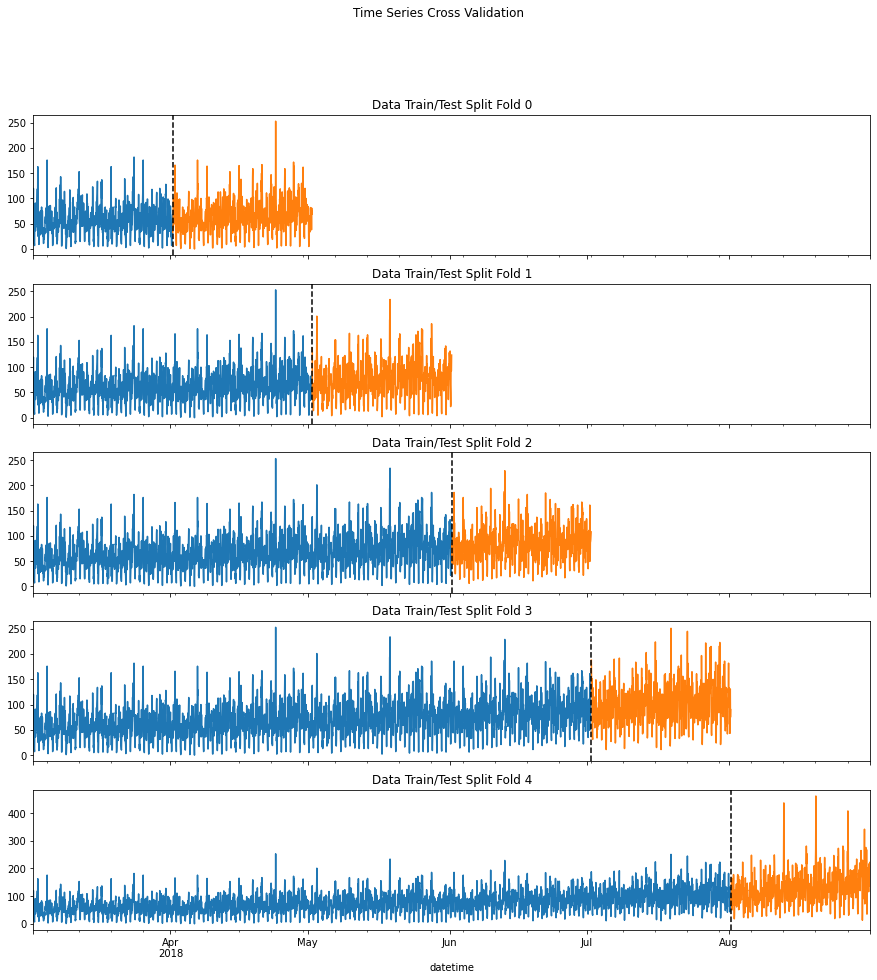

In [22]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['num_orders'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['num_orders'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.suptitle('Time Series Cross Validation')
plt.show()

Создадим функцию для поиска лучших параметров моделей и вывода RMSE на лучших параметрах.

In [23]:
def find_RMSE(model, features_inp, target_inp, grid_param):
    model_grid = GridSearchCV(
        estimator = model, param_grid = grid_param, cv=tss, scoring='neg_root_mean_squared_error'
    )
    model_grid.fit(features_inp, target_inp)
    print(model_grid.best_params_)
    return model_grid.best_score_ * -1

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно.</font>

### Линейная регрессия

In [24]:
%%time
grid_param = {'n_jobs': [-1]}
find_RMSE(LinearRegression(), X_train, y_train, grid_param)

{'n_jobs': -1}
CPU times: user 241 ms, sys: 642 ms, total: 883 ms
Wall time: 878 ms


27.13838457818997

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### Дерево решений

In [25]:
%%time
dt_regressor = DecisionTreeRegressor() 

grid_param = {'max_depth':[x for x in range(1, 20)], 
               'random_state':[RANDOM_STATE]}

find_RMSE(dt_regressor, X_train, y_train, grid_param)

{'max_depth': 5, 'random_state': 12345}
CPU times: user 2.88 s, sys: 82.9 ms, total: 2.96 s
Wall time: 3.03 s


30.201113619438708

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### Случайный лес

In [26]:
%%time
# Подберем параметры для модели случайного леса
grid_param = {'n_estimators': [int(x) for x in range(20, 121, 20)],
              'max_depth': [x for x in range(1, 20, 2)],
              'random_state':[RANDOM_STATE],
              'n_jobs': [-1]}

rf_regressor = RandomForestRegressor()

find_RMSE(rf_regressor, X_train, y_train, grid_param)

{'max_depth': 15, 'n_estimators': 120, 'n_jobs': -1, 'random_state': 12345}
CPU times: user 5min 46s, sys: 1.53 s, total: 5min 47s
Wall time: 5min 48s


25.08393508951357

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### LightGBM

In [30]:
%%time
lgbm_regressor = LGBMRegressor()

grid_param = [{'n_estimators': [int(x) for x in range(60, 121, 20)],
                'num_leaves':[31, 100, 200], 
                'learning_rate':[0.1, 0.3, 0.5],
                'random_state':[RANDOM_STATE],
                'n_jobs': [3]}]

find_RMSE(lgbm_regressor, X_train, y_train, grid_param)

{'learning_rate': 0.1, 'n_estimators': 60, 'n_jobs': 3, 'num_leaves': 200, 'random_state': 12345}
CPU times: user 1min 35s, sys: 1.75 s, total: 1min 37s
Wall time: 1min 37s


25.0428356500414

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### CatBoost

In [28]:
%%time
cb_regressor = CatBoostRegressor() 

grid_param = {'iterations' : [300],
              'learning_rate':[0.1, 0.5, 0.8],
              'random_state':[RANDOM_STATE],
              'loss_function':['RMSE'],
              'verbose':[False]}

find_RMSE(cb_regressor, X_train, y_train, grid_param)

{'iterations': 300, 'learning_rate': 0.1, 'loss_function': 'RMSE', 'random_state': 12345, 'verbose': False}
CPU times: user 26.6 s, sys: 614 ms, total: 27.2 s
Wall time: 54.8 s


24.382846837202624

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

**Вывод:**

Мы разделили данные на обучающую и тестовую выборки и обучили модели линейной регрессии, дерева решений, случайного леса, LightGBM и CatBoost. Наилучшее значение метрики RMSE оказалось у CatBoost, так же у этой модели наилучшее соотношение скорости работы и качества предсказания, на ней и будем тестировать.

## Тестирование

### CatBoost

In [29]:
%%time
cb_regressor = CatBoostRegressor(iterations = 300, learning_rate=0.1, verbose=100,
                         loss_function='RMSE', random_state=RANDOM_STATE)
cb_regressor.fit(X_train, y_train)
pred = cb_regressor.predict(X_test)
rmse_cb = mean_squared_error(y_test, pred, squared=False)
rmse_cb

0:	learn: 36.9358368	total: 8.34ms	remaining: 2.49s
100:	learn: 19.8539096	total: 764ms	remaining: 1.5s
200:	learn: 16.4230812	total: 1.73s	remaining: 852ms
299:	learn: 14.2916502	total: 2.58s	remaining: 0us
CPU times: user 2.64 s, sys: 47.4 ms, total: 2.69 s
Wall time: 3.72 s


40.69027145869992

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

## Итоговый вывод

Мы получили данные заказов такси с марта по август 2018 года. Изменили тип данных Datetime с object на datetime64 и установили индекс таблицы равным столбцу Datetime. Проверили на наличие пропусков, на монотонность и ресемплировали данные по часу (изначально данные за каждые 10 минут).

Далее мы проанализировали графики временного ряда, сначала по всем данным, затем по месяцу и по 2 дням и выявили тренд на увеличение количества заказов с течением времени, а также то, что пик заказов приходится на 12 ночи, а минимальное количество заказов на 6 утра. Проверили на стационарность временного ряда. Затем мы создали календарные признаки для месяца, дня, дня недели и часа и отстающие признаки, а также скользящее среднее. Удалили пропуски и получили таблицу с 29 признаками, готовую для построения моделей.

Затем разделили данные на обучающую и тестовую выборки и обучили модели линейной регрессии, дерева решений, случайного леса, LightGBM и CatBoost. Наилучшее значение метрики RMSE и оптимальное соотношение скорости и прогностической способности оказалось у CatBoost.

Протестировали модель CatBoost на тестовых данных и получили значение RMSE 40.69.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'> Рамиль, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не используй признаки "год" и "месяц" на данных меньше года.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Рамиль, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb \
Или [Предсказываем будущее с помощью библиотеки Facebook Prophet](https://habr.com/ru/company/ods/blog/323730/)
</font> 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48